# 测试

In [168]:
Ex = 89
En = 4
He = 0.5
n = 3000

In [169]:
Ex2 = 85
En2 = 3
He2 = 0.5
n = 3000

In [170]:
import random
import numpy as np
x = []
y = []
Enn = []

Enn = np.random.randn(3000,1) * He + En
x = Enn * np.random.randn(3000,1) + Ex
print(x.min(),x.max())
y = np.exp(-(x - Ex)**2/(2*Enn**2))
print(min(y),max(y))

71.56429755190511 102.89651686848048
[0.00175708] [0.99999996]


In [171]:
x2 = []
y2 = []
Enn2 = []

Enn2 = np.random.randn(3000,1) * He2 + En2
x2 = Enn2 * np.random.randn(3000,1) + Ex2
print(x2.min(),x2.max())
y2 = np.exp(-(x2 - Ex2)**2/(2*Enn2**2))
print(min(y2),max(y2))

75.4691965233646 94.80563274822765
[0.00508398] [0.99999955]


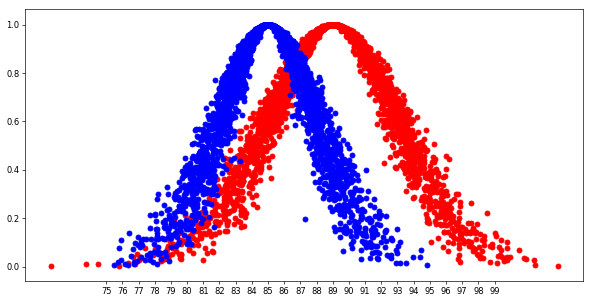

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6), dpi= 60)  # 宽20，高8，每英寸上像素点的个数

plt.scatter(x,y,color = 'r')
plt.scatter(x2,y2,color = 'b')

# 设置横轴间隔
plt.xticks(range(75,100))

# 保存
# plt.savefig('./picture/t1.png')
plt.show()

In [173]:
Enn

array([[3.35837638],
       [3.15320193],
       [3.08355856],
       ...,
       [3.23831128],
       [3.55007245],
       [3.82274097]])

# 获取数据

In [174]:
import pandas as pd
import numpy as np

df=pd.read_csv('数据2.csv',encoding="gbk",header = None)#可以通过sheet_name来指定读取的表单

df_new = df.copy(deep=True)
df_new = df_new.T
df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,82,86,84,87,88,83,89,90,83,82,74,88,86,90,85,74,83,80,80
1,84,83,81,89,87,87,92,82,85,81,86,86,83,93,85,73,85,83,82
2,81,81,85,83,91,86,90,84,87,75,77,85,80,83,84,79,83,82,87
3,79,72,83,84,90,89,88,87,89,73,85,85,78,86,86,82,87,81,84
4,84,79,80,83,86,92,87,89,83,84,70,87,88,83,90,84,80,86,87
5,83,90,89,76,87,90,90,92,82,78,88,79,86,86,76,81,81,75,90
6,82,84,84,81,90,88,94,87,94,80,79,78,84,82,89,81,81,74,78
7,77,86,86,84,84,89,88,86,90,82,76,86,85,84,88,79,85,83,81


In [175]:
f_Ex = lambda x : x.mean()
Ex = df_new.apply(f_Ex)
Ex = Ex.values

En = []
for i in range(len(Ex)):
    En.append(np.sqrt(np.pi/2) * np.sum(np.abs(df_new.loc[:,i] - Ex[i]))/8)
En = np.array(En)

SS = []
for i in range(len(Ex)):
    SS.append(1/7 * np.sum((df_new.loc[:,i] - Ex[i])**2))
SS = np.array(SS)

He = np.sqrt(np.abs(SS - En**2))

In [176]:
Ex

array([81.5  , 82.625, 84.   , 83.375, 87.875, 88.   , 89.75 , 87.125,
       86.625, 79.375, 79.375, 84.25 , 83.75 , 85.875, 85.375, 79.125,
       83.125, 80.5  , 83.625])

In [177]:
En

array([2.34996401, 4.97409048, 2.50662827, 3.28994961, 2.34996401,
       2.50662827, 2.19329974, 3.01578714, 4.22993521, 3.79910848,
       6.54073315, 3.60327814, 3.21161748, 3.60327814, 3.60327814,
       3.60327814, 2.38913007, 3.91660668, 4.22993521])

In [178]:
SS

array([ 6.        , 29.69642857,  8.        , 15.125     ,  5.55357143,
        7.42857143,  5.35714286, 10.41071429, 17.41071429, 14.26785714,
       40.55357143, 13.64285714, 11.07142857, 14.69642857, 18.83928571,
       14.69642857,  5.83928571, 16.85714286, 16.83928571])

In [179]:
He

array([0.69113614, 2.22594978, 1.31027276, 2.07394107, 0.17675008,
       1.07022714, 0.73930989, 1.14705806, 0.69400117, 0.40665476,
       1.49252094, 0.81193827, 0.870024  , 1.30874565, 2.41984965,
       1.30874565, 0.36241303, 1.23180152, 1.02619014])

In [180]:
Ex = Ex.reshape(19,1)
En = En.reshape(19,1)
He = He.reshape(19,1)

In [181]:
Ex.shape

(19, 1)

In [182]:
result = np.concatenate((Ex,En, He),axis = 1)

In [183]:
df_result = pd.DataFrame(result, columns = ['Ex','En','He'])

In [184]:
df_result.to_csv('result.csv')

In [185]:
df_result

,Ex,En,He
0,81.500,2.349964,0.691136
1,82.625,4.974090,2.225950
2,84.000,2.506628,1.310273
3,83.375,3.289950,2.073941
4,87.875,2.349964,0.176750
5,88.000,2.506628,1.070227
6,89.750,2.193300,0.739310
7,87.125,3.015787,1.147058
8,86.625,4.229935,0.694001
9,79.375,3.799108,0.406655


In [186]:
w1 = np.array([0.432,0.231,0.186,0.151]).reshape(1,4)
Ex1 = np.dot(w1,Ex[:4])/np.sum(w1)
En1 = np.dot(w1**2 , En[:4])/np.sum(w1**2)
He1 = np.dot(w1**2 , He[:4])/np.sum(w1**2)

In [187]:
w2 = np.array([0.352,0.141,0.243,0.264]).reshape(1,4)
Ex2 = np.dot(w2,Ex[4:8])/np.sum(w2)
En2 = np.dot(w2**2 , En[4:8])/np.sum(w2**2)
He2 = np.dot(w2**2 , He[4:8])/np.sum(w2**2)

In [188]:
w3 = np.array([0.448,0.202,0.109,0.241]).reshape(1,4)
Ex3 = np.dot(w3,Ex[8:12])/np.sum(w3)
En3 = np.dot(w3**2 , En[8:12])/np.sum(w3**2)
He3 = np.dot(w3**2 , He[8:12])/np.sum(w3**2)

In [189]:
w4 = np.array([0.205,0.531,0.264]).reshape(1,3)
Ex4 = np.dot(w4,Ex[12:15])/np.sum(w4)
En4 = np.dot(w4**2 , En[12:15])/np.sum(w4**2)
He4 = np.dot(w4**2 , He[12:15])/np.sum(w4**2)

In [190]:
w5= np.array([0.325,0.169,0.317,0.189]).reshape(1,4)
Ex5 = np.dot(w1,Ex[15:])/np.sum(w1)
En5 = np.dot(w1**2 , En[15:])/np.sum(w1**2)
He5 = np.dot(w1**2 , He[15:])/np.sum(w1**2)

In [212]:
Ex_2 = np.array([Ex1,Ex2,Ex3,Ex4,Ex5])
Ex_2 = Ex_2.reshape(5,1)

In [213]:
En_2 = np.array([En1,En2,En3,En4,En5])
En_2 = En_2.reshape(5,1)

In [214]:
He_2 = np.array([He1,He2,He3,He4,He5])
He_2 = He_2.reshape(5,1)

In [215]:
w = np.array([0.321,0.223,0.134,0.276,0.046]).reshape(1,5)
w.shape

(1, 5)

In [217]:
Ex_end = np.dot(w,Ex_2)/np.sum(w)
En_end = np.dot(w**2 , En_2)/np.sum(w**2)
He_end = np.dot(w**2 , He_2)/np.sum(w**2)

In [218]:
print(Ex_end,En_end,He_end)

[[84.6416]] [[3.12121569]] [[1.10255481]]


In [222]:
result = np.concatenate((Ex_2,En_2, He_2),axis = 1)

In [224]:
df_result = pd.DataFrame(result, columns = ['Ex2','En2','He2'])

In [225]:
df_result.to_csv('resul2t.csv')